<a href="https://colab.research.google.com/github/prajwalDU/Bike-sharing-demand-prdiction-prajwal/blob/main/Final_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


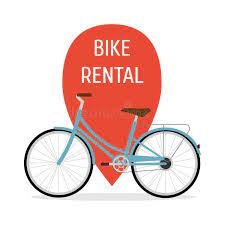

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [34]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Mounting drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/almabetter/ML/SeoulBikeData.csv', encoding = 'unicode_escape')

In [37]:
# Checking first 5 rows of data
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [38]:
# Checking last 5 rows of data
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [39]:
# Check the shape of data
data.shape

(8760, 14)

In [40]:
# Get easy way to familiar with dataset is checking dataset type
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [41]:
# Another way to get familiar with dataset is checking describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [42]:
# Checking sum of null values in each columns
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **EDA**

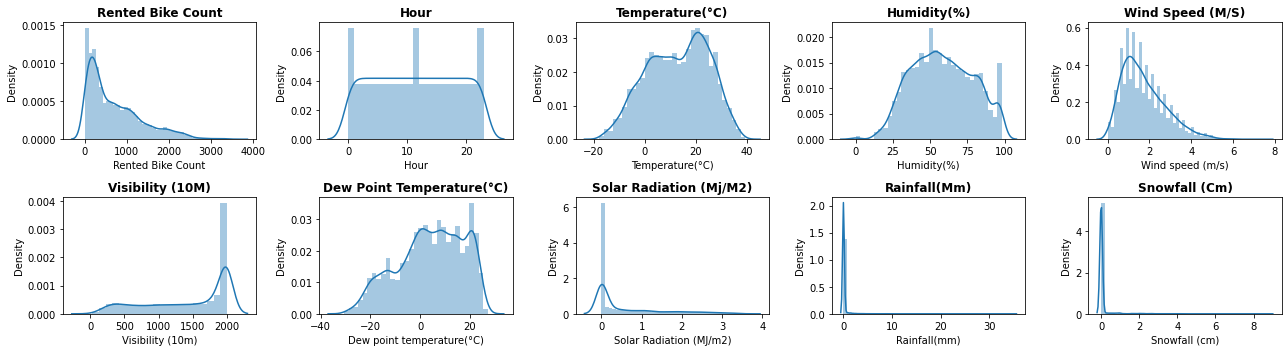

In [43]:
# Visualizing the distribution
plt.figure(figsize=(18,5))
for n, column in enumerate(data.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

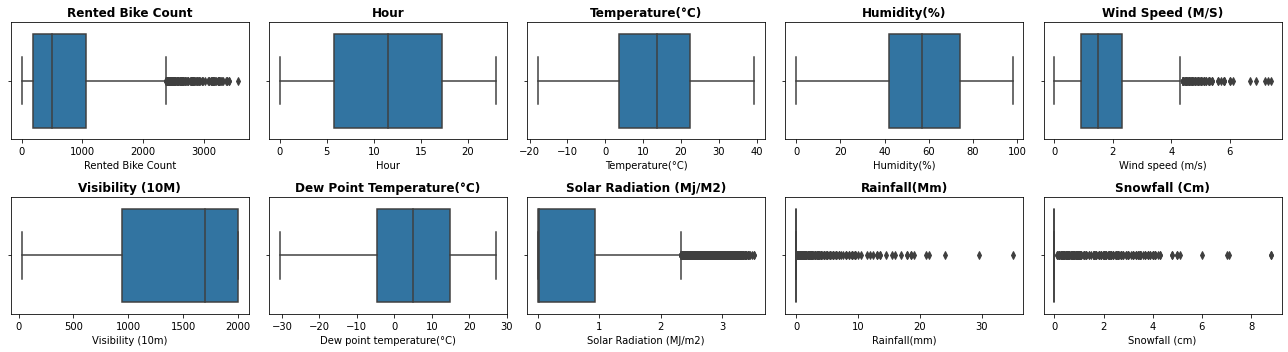

In [44]:
import enum
# Checking outlieres using boxplot
plt.figure(figsize=(18,5))
for n, column in enumerate(data.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

In [61]:
# Removing outliers by using IQR method:
q1, q3, median = data['Rented Bike Count'].quantile([0.25,0.5,0.75])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data['Rented Bike Count'] = np.where(data['Rented Bike Count'] > upper_limit, median, np.where(
                              data['Rented Bike Count'] < lower_limit, median, data['Rented Bike Count']))

# Removing outliers by capping
for col in ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
  upper_limit = data[col].quantile(0.99)
  data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

In [45]:
# Creating new features from date and hour column
data['weekend'] = data['Date'].apply(lambda x : 1 if (x=='saturday' or x=='sunday') else 0)
data['Day/Night'] = data['Hour'].apply(lambda x : 'Night' if (x > 20 or x < 5) else('Day'))

# Droping the date column
data.drop(columns=['Date'], inplace=True)

In [46]:
# Lets take care of categorical columns
categorical_features = [i for i in data.columns if i not in data.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'Day/Night']

In [47]:
for col in categorical_features:
  print(data[col].value_counts(), '\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning Day, dtype: int64 

Day      5840
Night    2920
Name: Day/Night, dtype: int64 



In [48]:
# Defining label encoder based on above data
encoder = {'Holiday' : {'Holiday':1, 'No Holiday':0},
           'Functioning Day' : {'Yes':1, 'No':0},
           'Day/Night' : {'Day':1, 'Night':0}}
    
# Label encoding
data = data.replace(encoder)

In [49]:
# Apply one hot encoding on seasons column
data = pd.get_dummies(data, columns=['Seasons'], prefix='', prefix_sep='')

In [62]:
# Looking our new dataset
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,Day/Night,Autumn,Spring,Summer,Winter
0,254.00,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.00,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.00,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.00,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.00,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1065.25,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,1,1,0,0,0
8756,764.00,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,1,1,0,0,0
8757,694.00,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,1,0,0,0
8758,712.00,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,1,0,0,0


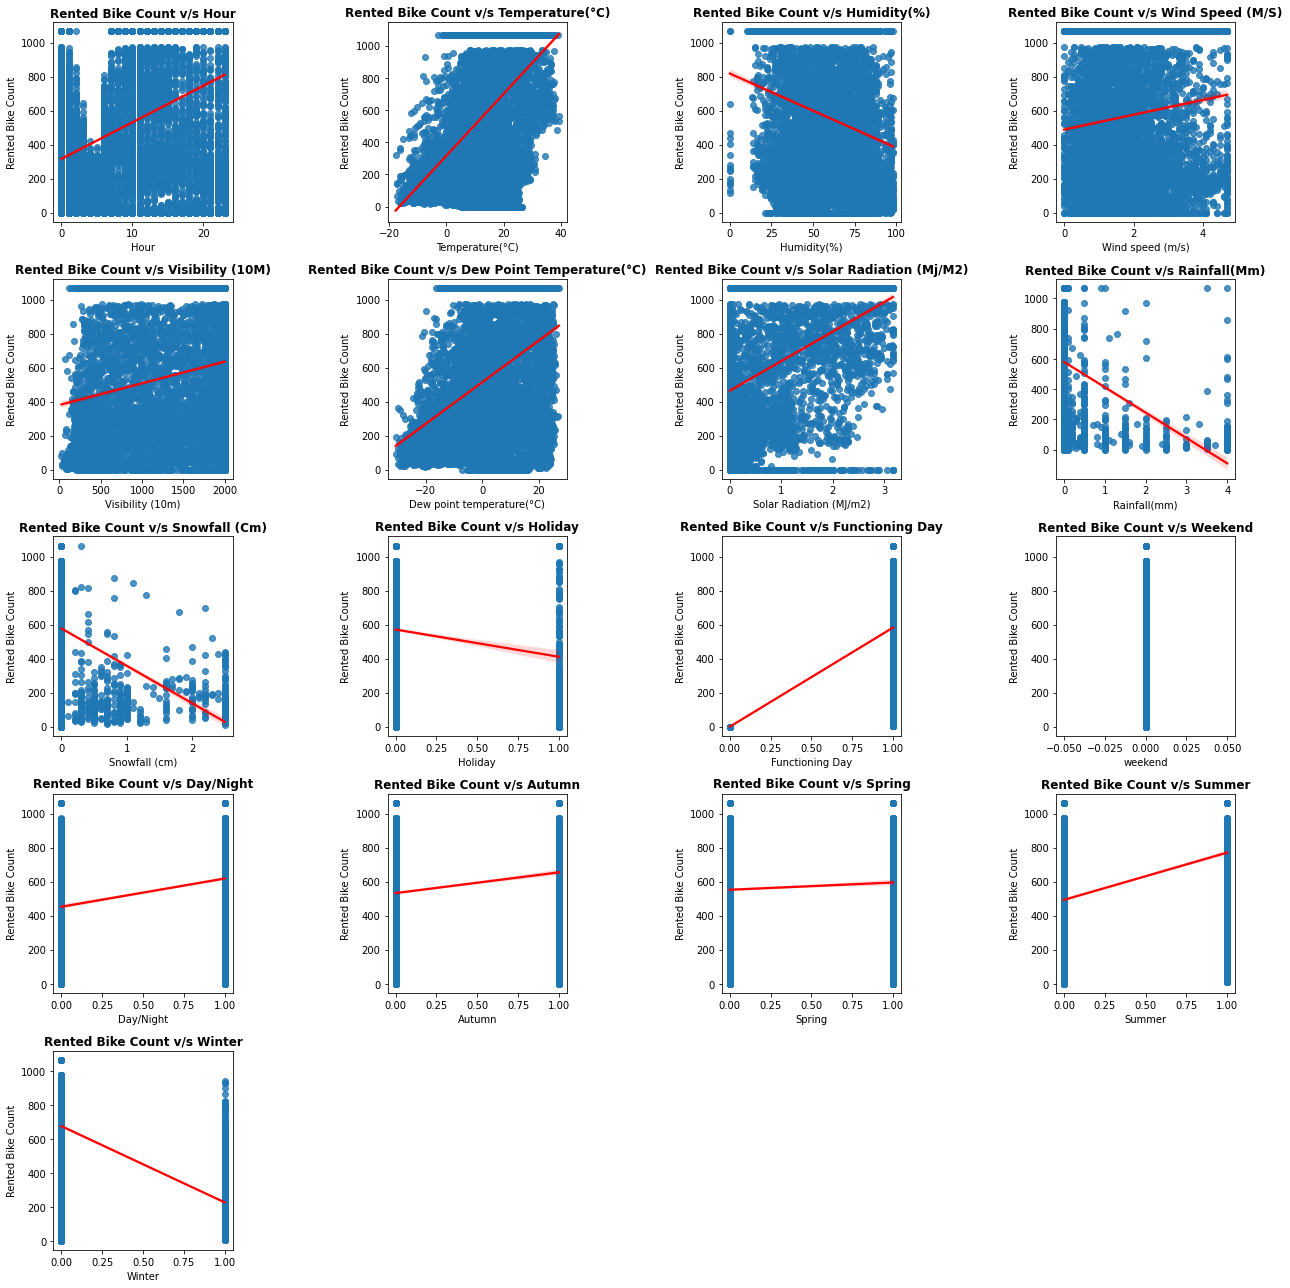

In [63]:
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]

# Checking linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = data, x=column, y='Rented Bike Count', line_kws={"color":"red"})
  plt.title(f'Rented Bike Count v/s {column.title()}', fontweight='bold')
  plt.tight_layout()

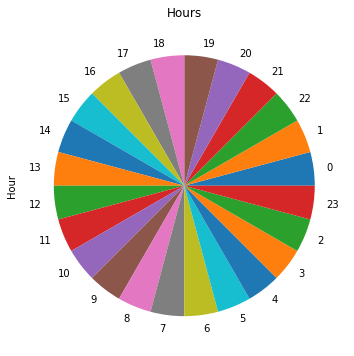

In [ ]:
# Ploting hour column using pie chart
plt.figure(figsize=(9,6))
plt.title('Hours')
data['Hour'].value_counts().plot(kind='pie')
plt.show()

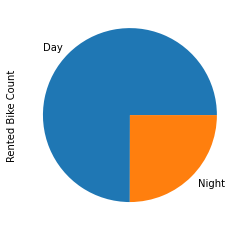

In [ ]:
# Ploting label day night column using pie chart
data.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

Here we clearly seen 75% bike booking has done on day time only 25% on night time

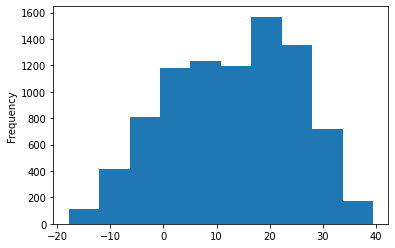

In [ ]:
# Ploting temperature column using hist plot
data['Temperature(°C)'].plot(kind='hist')
plt.show()

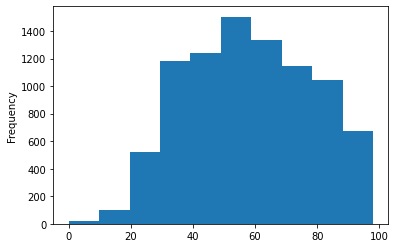

In [ ]:
# Ploting humidity using hist plot
data['Humidity(%)'].plot(kind='hist')
plt.show()

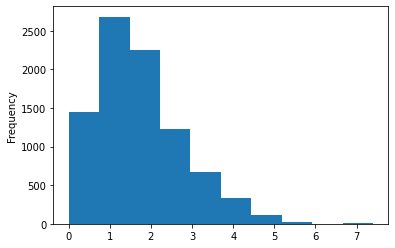

In [ ]:
# Ploting wind speed using hist plot
data['Wind speed (m/s)'].plot(kind='hist')
plt.show()

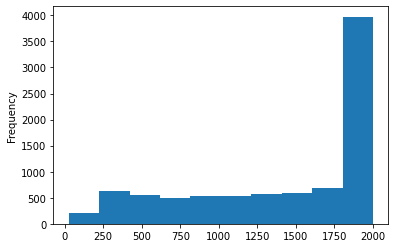

In [ ]:
# Ploting visibility using hist plot
data['Visibility (10m)'].plot(kind='hist')
plt.show()

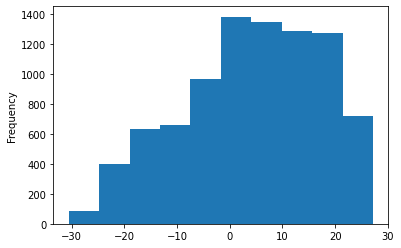

In [ ]:
# Ploting dew point temperature using hist plot
data['Dew point temperature(°C)'].plot(kind='hist')
plt.show()

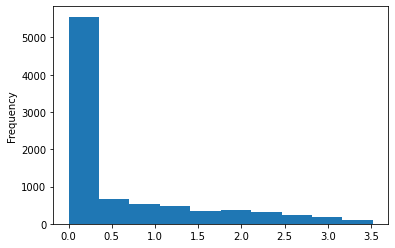

In [ ]:
# Ploting solar radiation using hist plot
data['Solar Radiation (MJ/m2)'].plot(kind='hist')
plt.show()

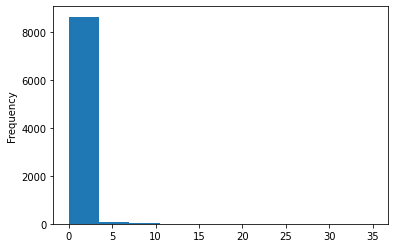

In [ ]:
# Ploting rainfall using hist plot
data['Rainfall(mm)'].plot(kind='hist')
plt.show()

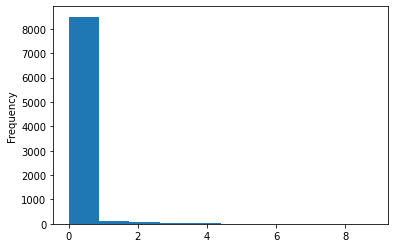

In [ ]:
# Ploting snowfall using hist plot
data['Snowfall (cm)'].plot(kind='hist')
plt.show()

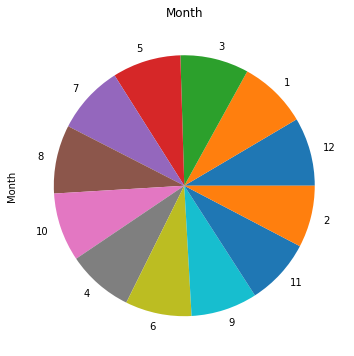

In [ ]:
# Ploting month using pie plot
plt.figure(figsize=(9,6))
plt.title('Month')
data['Month'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
# Checking in which seasons solar radiation is more  
data1VizSolarRadiation = pd.DataFrame(data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
data1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


As we know generally summer is more heat

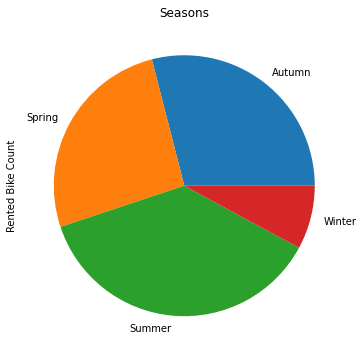

In [ ]:
# Plot seasons column using pie chart
plt.figure(figsize=(9,6))
plt.title('Seasons')
data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()
plt.show()

As see above we know genarally in summer season bike rented more and in winter is less

In [ ]:
# Checking in which day bike rent rate is high 
data1vizdays = pd.DataFrame(data.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
data1vizdays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


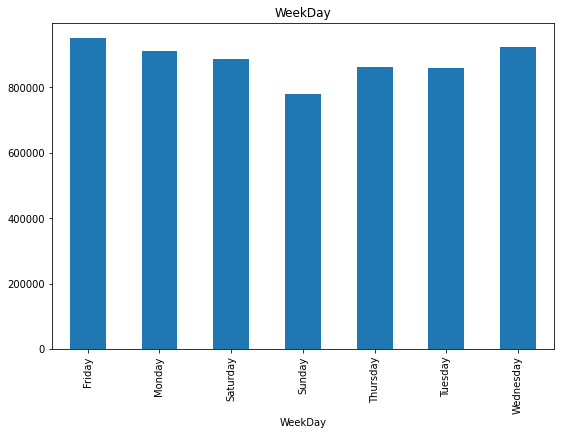

In [ ]:
# Plot weekday column using bar chart
plt.figure(figsize=(9,6))
plt.title('WeekDay')
data.groupby('WeekDay').sum()['Rented Bike Count'].plot.bar()
plt.show()

As we see above plot in week days bike rented is high and in weekend generally low

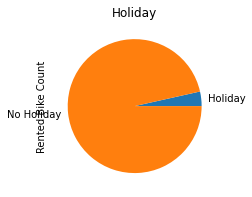

In [ ]:
# Plot holiday using pie chart
plt.figure(figsize=(3,4))
plt.title('Holiday')
data.groupby('Holiday').sum()['Rented Bike Count'].plot.pie()
plt.show()

As we seen clearly in holiday time bike rent rate is too low

In [ ]:
# Checking skewness of all columns
data.skew().sort_values(ascending=True)

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
WeekDay Encoding             -0.003771
Hour                          0.000000
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

Visibility, Dew point temperature(°C), Temperature(°C), Month, WeekDay Encoding are negatively Skewed,             
Hour, Humidity, wind speed(m/s) are normally distributed and               
rented Bike Coun, Solar Radiation (MJ/m2), Snowfall (cm), Rainfall(mm) are Positively skewed.

In [ ]:
# Taking only holiday datset using loc method 
dataHoliday=data.loc[data['Holiday'] == 'Holiday']

In [ ]:
# Checking shape of dataset
dataHoliday.shape

(432, 18)

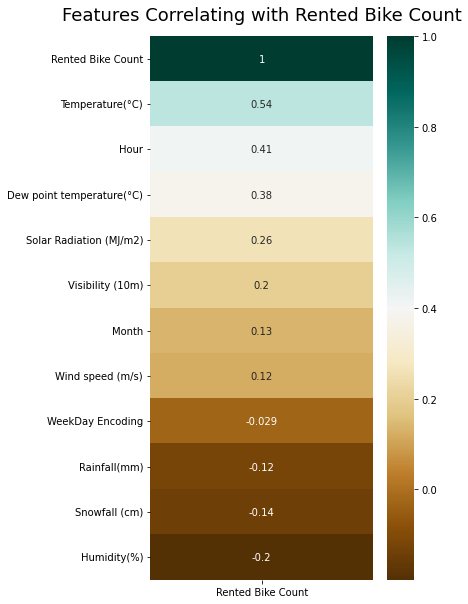

In [ ]:
# ploting heat map 
corelation = data.corr()
plt.figure(figsize=(5,10))
plot = sns.heatmap(corelation[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), annot=True, cmap='BrBG')
plot.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Importing packages
from sklearn import preprocessing
from sklearn import linear_model 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
reporting = {}

In [ ]:
# Dividing dataset into independent and dependent variables
x = data.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'], axis=1)
y = data.iloc[:,1]

In [ ]:
# divide datset into train and test split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.27, random_state=0) 

Above we divide our dataset into train and test set

In [ ]:
# Scaling our train dataset using minmaxscalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

Above we use scaling method to keep our all data in same manner 

In [ ]:
# check the shape of train and text dataset
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6394, 11) (6394,)
(2366, 11) (2366,)


# **Linear Regression**

In [ ]:
# Fit the linear model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Checking intercept
lr_model.intercept_

-51.90265940139636

In [ ]:
# Checking coefficient
lr_model.coef_

array([  625.57887848,  1400.20173014,  -916.30774436,    83.87807052,
          23.70942292,   398.51676136,  -274.98320042, -1971.93699327,
         104.2235693 ,    83.07290849,   -44.14619546])

In [ ]:
# Checking prediction
y_pred = lr_model.predict(x_test)

In [ ]:
y_pred

array([ 328.2804943 ,  632.84120193,  621.80481144, ..., -142.55961312,
          2.48048092, -159.56195931])

In [ ]:
mean_squared_error(y_test, y_pred)

222611.76779346197

In [ ]:
from numpy import math
math.sqrt(mean_squared_error(y_test, y_pred))

471.8175153525587

In [ ]:
linear_r2 = r2_score(y_test, y_pred)
linear_r2

0.4649275989611815

In [ ]:
reporting['Linear regression']= linear_r2

# **Ridge**


In [ ]:
# Divide dataset to independent and dependent variables
x_ridgerig = data.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'], axis=1)
y_ridgerig = data.iloc[:,1]

In [ ]:
# Divide dataset into train and test split
x_train,x_test,y_train,y_test = train_test_split(x_ridgerig, y_ridgerig, test_size = 0.27, random_state = 0)

In [ ]:
# Fitting grid search cross validation model with ridge
ridge = Ridge()
parameters = {'alpha':list(range(-300,300))}

gridsearchcv = GridSearchCV(ridge, parameters, scoring='r2', cv=3)
gridsearchcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [ ]:
# Checking best estimator
gridsearchcv.best_estimator_

Ridge(alpha=25)

In [ ]:
# Finding best score on train
best_score = gridsearchcv.score(x_train, y_train)
best_score

0.47559488165929953

In [ ]:
y_pred_r = gridsearchcv.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_r)

222620.0724352018

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_r))

471.8263159629842

In [ ]:
ridge_r2 = r2_score(y_test, y_pred_r)
ridge_r2

0.4649076378214829

In [ ]:
reporting['Ridge regression']= ridge_r2

NameError: ignored

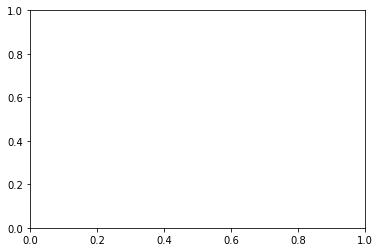

In [ ]:
ax = plt.gca()
ax.plot(parameters, coefs)
ax.set_xscale('log')
ax.set_ylim(-100,100)
plt.show()

## **Lasso**

In [ ]:
# Fitting lasso with grid search cv
lasso = Lasso()
parameters = {'alpha':list(range(-300,300))}

gridsearchlasso = GridSearchCV(lasso, parameters, scoring='r2', cv=4)
gridsearchlasso.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [ ]:
# Check best estimator
gridsearchlasso.best_estimator_

Lasso(alpha=0)

In [ ]:
# Check score
best_score_lasso = gridsearchlasso.score(x_train, y_train)
best_score_lasso

0.4755956815245487

In [ ]:
y_pred_lasso = gridsearchlasso.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_lasso)

222611.74157526955

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_lasso))

471.817487568307

In [ ]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.4649276619795534

In [ ]:
reporting['Lasso regression'] = lasso_r2

In [ ]:
ax = plt.gca()
ax.plot(parameters, coefs)
ax.set_xscale('log')
ax.set_ylim(-75,75)
plt.show()

# **SVR Regression**

In [ ]:
# Fitting support vector machine model with grid search cv
svr_model = SVR()
param = {'C' : [800,1000,1400,1800,2200]}

gridsearchSVR = GridSearchCV(svr_model, param, scoring = 'r2', cv = 5)
gridsearchSVR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [800, 1000, 1400, 1800, 2200]}, scoring='r2')

In [ ]:
# Finding best estimator
gridsearchSVR.best_estimator_

SVR(C=2200)

In [ ]:
# Checking score 
gridsearchSVR.score(x_train, y_train)

0.39932928812244806

In [ ]:
# Checking best score
gridsearchSVR.best_score_

0.38665729429000556

In [ ]:
y_pred_svr = gridsearchSVR.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_svr)

252527.0187056

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_svr))

502.52066495379074

In [ ]:
svr_r2 = r2_score(y_test, y_pred_svr)
svr_r2

0.39302293151301926

In [ ]:
reporting['SVR'] = svr_r2

## **Decision Tree Regressor**

We first need to standartize our data and also make transformation

In [ ]:
# standaradization our independenet data 
scalarTrain = preprocessing.StandardScaler().fit(x_train)
scalarTest = preprocessing.StandardScaler().fit(x_test)
x_train_scaled = scalarTrain.transform(x_train)
x_test_scaled = scalarTest.transform(x_test)

In [ ]:
# Fit the decision tree model with grid search cv
decisiontree = DecisionTreeRegressor()
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridsearch_decisiontree = GridSearchCV(decisiontree, param, scoring='r2', cv=6)
gridsearch_decisiontree.fit(x_train_scaled, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [ ]:
# Finding best estimator
gridsearch_decisiontree.best_estimator_

DecisionTreeRegressor(max_depth=8)

In [ ]:
# Checking score
gridsearch_decisiontree.score(x_train_scaled, y_train)

0.8037203531381983

In [ ]:
y_pred_decisiontree = gridsearch_decisiontree.predict(x_test_scaled)
y_pred_decisiontree

array([186.38709677, 671.84615385, 411.26086957, ...,  33.53846154,
       314.9       ,  92.18181818])

In [ ]:
decisiontree_r2 = r2_score(y_test, y_pred_decisiontree)
decisiontree_r2

0.7180437250084675

In [ ]:
reporting['Decision Tree Regressor'] = decisiontree_r2

# Random Forest Regressor

In [ ]:
# Fitting randeom forest with grid search cv
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=100, num=10)], 
         'max_depth' : [60,70,80,90,100],
         'min_samples_split':[2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(x_train_scaled,y_train)

this is how we predict the target of one day with its features

In [ ]:
# Finding best estimator
gridSearch_RandomForest.best_estimator

0.979527305143068

In [ ]:
# Checking score
gridSearch_RandomForest.score(x_train_scaled, y_train)

In [ ]:
y_pred_rftree = gridSearch_RandomForest.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_rftree)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_rftree))

In [ ]:
RF_r2 = r2_score(y_test, y_pred_rftree)
RF_r2

In [ ]:
reporting['Random Forest Regressor'] = RF_r2

# Present all the results of every model in a data frame and plot these in function of the model

In [ ]:
data.results = pd.DataFrame()
data_results['modle'] = reporting.keys()
data_results['Score R2'] = reporting.values()

In [ ]:
data_results = data_results.set_index('model')

In [ ]:
dataVizModels=pd.DataFrame(data_results['Score R2'].sort_values(ascending=False))
dataVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))